# Практическая работа №3
### Выполнила студентка группы БВТ2101 Пьянова Анна Олеговна

### Примечание к задачам
Необходимо использовать модуль numpy

Все данные должны считываться из файла в виде массива numpy

Результаты необходимо сохранять в файл

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_from_file(filename):
  return np.loadtxt(filename, delimiter=',')

def save_to_file(matrix, filename, format='%.6f'):
  np.savetxt(filename, matrix, fmt=format, delimiter=',')

def save_tensor_to_file(tensor, filename):
  with open(filename, 'w') as file:
    for slice_2d in tensor:
      np.savetxt(file, slice_2d, fmt='%.6f', delimiter=',')
      file.write('\n')

def load_tensor_from_file(filename, shape):
  depth, height, width = shape
  tensor = np.zeros(shape)
  with open(filename, 'r') as file:
    for d in range(depth):
      slice_2d = np.loadtxt(file, delimiter=',', max_rows=height)
      tensor[d] = slice_2d
  return tensor

### Задача 1
Дано множество из p матриц (n,n) и множество из p векторов (n,1). Написать функцию для рассчета суммы p произведений матриц (результат имеет размерность (n,1))

In [3]:
matrices = [np.random.rand(3, 3) for _ in range(5)]
vectors = [np.random.rand(3, 1) for _ in range(5)]

for i, matrix in enumerate(matrices):
  save_to_file(matrix, f'task1_matrix_{i}.txt')

for i, vector in enumerate(vectors):
  save_to_file(vector, f'task1_vector_{i}.txt')

In [4]:
def sum_of_products(matrices, vectors):
  result = np.zeros((matrices[0].shape[0], 1))
  for matrix, vector in zip(matrices, vectors):
    result += matrix @ vector
  return result

matrices = [load_from_file(f'task1_matrix_{i}.txt') for i in range(5)]
vectors = [load_from_file(f'task1_vector_{i}.txt').reshape(-1, 1) for i in range(5)]
save_to_file(sum_of_products(matrices, vectors), 'res1.txt')

### Задача 2
Написать функцию преобразовывающую вектор чисел в матрицу бинарных представлений

In [5]:
save_to_file(np.array([1, 2, 4, 8, 16]), 'task2_vector.txt', '%d')

In [6]:
def vector_to_binary_matrix(vector):
  max_bits = max(int(np.ceil(np.log2(v + 1))) for v in vector)
  binary_matrix = np.zeros((len(vector), max_bits), dtype=int)
  for i, v in enumerate(vector):
    binary_representation = format(int(v), f'0{max_bits}b')
    binary_matrix[i] = [int(bit) for bit in binary_representation]
  return binary_matrix

vector = load_from_file('task2_vector.txt')
save_to_file(vector_to_binary_matrix(vector), 'res2.txt', '%d')

### Задача 3
Написать функцию, которая возвращает все уникальные строки матрицы

In [7]:
save_to_file(np.array([[3, 2], [3, 4], [1, 3], [3, 4], [5, 6]]), 'task3_matrix.txt', '%d')

In [8]:
def unique_rows(matrix):
  unique_rows, count = np.unique(matrix, axis=0, return_counts=True)
  unique_rows = unique_rows[count == 1]
  return unique_rows

matrix = load_from_file('task3_matrix.txt')
save_to_file(unique_rows(matrix), 'res3.txt', '%d')

### Задача 4
Написать функцию, которая заполняет матрицу с размерами (M,N) случайными числами распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов, а также строит для каждой строки стоит гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [9]:
def fill_and_analyze_matrix(M, N):
  matrix = np.random.normal(size=(M, N))
  save_to_file(matrix, 'res4.txt')
  mean = np.mean(matrix, axis=0)
  variance = np.var(matrix, axis=0)

  for i, row in enumerate(matrix):
    plt.hist(row, bins=10)
    plt.title(f'Histogram of Row {i+1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.savefig(f'hist_row_{i+1}.png')
    plt.close()

  return mean, variance

mean, variance = fill_and_analyze_matrix(4, 6)
save_to_file(mean, 'res4_mean.txt')
save_to_file(variance, 'res4_var.txt')

### Задача 5
Написать функцию, которая заполняет матрицу (M,N) в шахматном порядке заданными числами a и b

In [10]:
def fill_checkerboard(M, N, a, b):
  matrix = np.zeros((M, N))
  matrix[::2, ::2] = a
  matrix[1::2, 1::2] = a
  matrix[::2, 1::2] = b
  matrix[1::2, ::2] = b
  return matrix

matrix = fill_checkerboard(7, 5, 3, 2)
save_to_file(matrix, 'res5.txt', '%d')

### Задача 6
Написать функцию, которая возвращает тензор представляющий изображение круга с заданным цветом и радиусом в схеме rgd на черном фоне

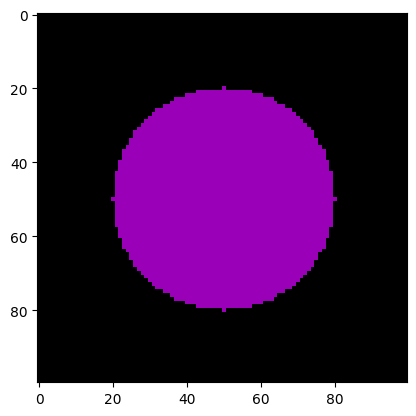

In [11]:
def create_circle(height, width, r, color):
  image = np.zeros((height, width, 3), dtype=np.uint8)
  cx, cy = width // 2, height // 2
  for y in range(height):
    for x in range(width):
      if (x - cx)**2 + (y - cy)**2 <= r**2:
        image[y, x] = color
  return image

plt.imshow(create_circle(100, 100, 30, [155, 0, 185]))
plt.savefig(f'res6.png')

### Задача 7
Написать функцию, которая стандартизирует все значения тензор (отнять мат. ожидание и поделить на СКО)

In [12]:
save_tensor_to_file(np.random.rand(3, 3, 3), 'task7_tensor.txt')

In [13]:
def standardize_tensor(tensor):
  mean = np.mean(tensor)
  std = np.std(tensor)
  standardized_tensor = (tensor - mean) / std
  return standardized_tensor

tensor = load_tensor_from_file('task7_tensor.txt', (3, 3, 3))
save_tensor_to_file(standardize_tensor(tensor), 'res7.txt')

<ipython-input-2-d1a9b6fd3fdd>:18: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=3`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  slice_2d = np.loadtxt(file, delimiter=',', max_rows=height)


### Задача 8
Написать функцию, выделяющую часть матрицы фиксированного размера с центром в данном элементе (дополненное значением fill если необходимо)

In [14]:
save_to_file(np.random.rand(5, 5), 'task8_matrix.txt')

In [15]:
def extract_submatrix(matrix, center, size, fill_value=0):
  M, N = matrix.shape
  x, y = center
  half_size = size // 2
  submatrix = np.full((size, size), fill_value, dtype=matrix.dtype)
  for i in range(size):
    for j in range(size):
      if 0 <= x - half_size + i < M and 0 <= y - half_size + j < N:
        submatrix[i, j] = matrix[x - half_size + i, y - half_size + j]
  return submatrix

matrix = load_from_file('task8_matrix.txt')
save_to_file(extract_submatrix(matrix, (2, 2), 3), 'res8.txt')


### Задача 9
Написать функцию, которая находит самое часто встречающееся число в каждой строке матрицы и возвращает массив этих значений

In [16]:
save_to_file(np.array([[1, 1, 2, 3], [4, 8, 5, 5], [6, 6, 6, 7]]), 'task9_matrix.txt', '%d')

In [17]:
def most_frequent_in_rows(matrix):
  most_frequent = np.zeros(matrix.shape[0], dtype=int)
  for i, row in enumerate(matrix):
    unique, counts = np.unique(row, return_counts=True)
    most_frequent[i] = unique[np.argmax(counts)]
  return most_frequent

array = load_from_file('task9_matrix.txt')
save_to_file(most_frequent_in_rows(array), 'res9.txt', '%d')


### Задача 10
Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Написать функцию, которая складывает каналы изображения с указанными весами, и возвращает результат в виде матрицы размера (height, width)

In [18]:
save_tensor_to_file(np.random.rand(20, 20, 3), 'task10_image.txt')
save_to_file(np.array([0.3, 0.5, 0.2]), 'task10_numChannels.txt')

In [19]:
def weighted_sum_channels(image, weights):
  result = np.zeros((image.shape[0], image.shape[1]))
  for i in range(image.shape[2]):
    result += image[:, :, i] * weights[i]
  return result

image = load_tensor_from_file('task10_image.txt', (20, 20, 3))
numChannels = load_from_file('task10_numChannels.txt')
save_to_file(weighted_sum_channels(image, numChannels), 'res10.txt')


<ipython-input-2-d1a9b6fd3fdd>:18: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=20`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  slice_2d = np.loadtxt(file, delimiter=',', max_rows=height)
